# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [270]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter


import warnings


## Notebook Presentation

In [171]:
pd.options.display.float_format = '{:,.2f}'.format

In [271]:
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load the Data

In [194]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

Here we look at the shape of our data's

In [229]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [230]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


Here we checking for NaN in our datas

In [231]:
print(df_hh_income.isna().values.any())
print(df_pct_poverty.isna().values.any())
print(df_pct_completed_hs.isna().values.any())
print(df_share_race_city.isna().values.any())
print(df_fatalities.isna().values.any())

True
False
False
True
True


Here we checking for duplicates in our data

In [232]:
print(df_hh_income.duplicated().values.any())
print(df_pct_poverty.duplicated().values.any())
print(df_pct_completed_hs.duplicated().values.any())
print(df_share_race_city.duplicated().values.any())
print(df_fatalities.duplicated().values.any())

False
False
False
False
False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [234]:
print(df_hh_income.isna().values.sum())
print(df_fatalities.isna().values.sum())

51
346


In [235]:
df_hh_income[df_hh_income.isna().values.any(axis=1)]

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN
29130,WY,Arrowhead Springs CDP,NaN
29132,WY,Atlantic City CDP,NaN
29133,WY,Auburn CDP,NaN
29139,WY,Bedford CDP,NaN
29140,WY,Bessemer Bend CDP,NaN


In [236]:
df_fatalities[df_fatalities.isna().values.any(axis=1)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.00,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.00,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.00,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.00,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False


In [237]:
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"], errors="coerce")
df_hh_income["Median Income"].fillna(df_hh_income["Median Income"].mean(), inplace=True)
print(df_hh_income.duplicated().values.any())

False


Here we filling the Nan with data value of zero or average in the case of fatalities

In [238]:
df_fatalities["age"] = pd.to_numeric(df_fatalities["age"])
df_fatalities["age"].fillna(df_fatalities["age"].median(), inplace=True)
df_fatalities["race"].fillna(value="0", inplace=True)
df_fatalities["armed"].fillna(value="0", inplace=True)
df_fatalities["flee"].fillna(value="0", inplace=True)
df_fatalities.isna().values.any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [243]:
#Here we coverting strings to numeric value
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")
df_pct_poverty["poverty_rate"].fillna(df_pct_poverty["poverty_rate"].mean(), inplace=True)
df_pct_poverty.isna().values.any()
grouped_poverty = df_pct_poverty.groupby("Geographic Area", as_index=False).agg({"poverty_rate": pd.Series.mean})


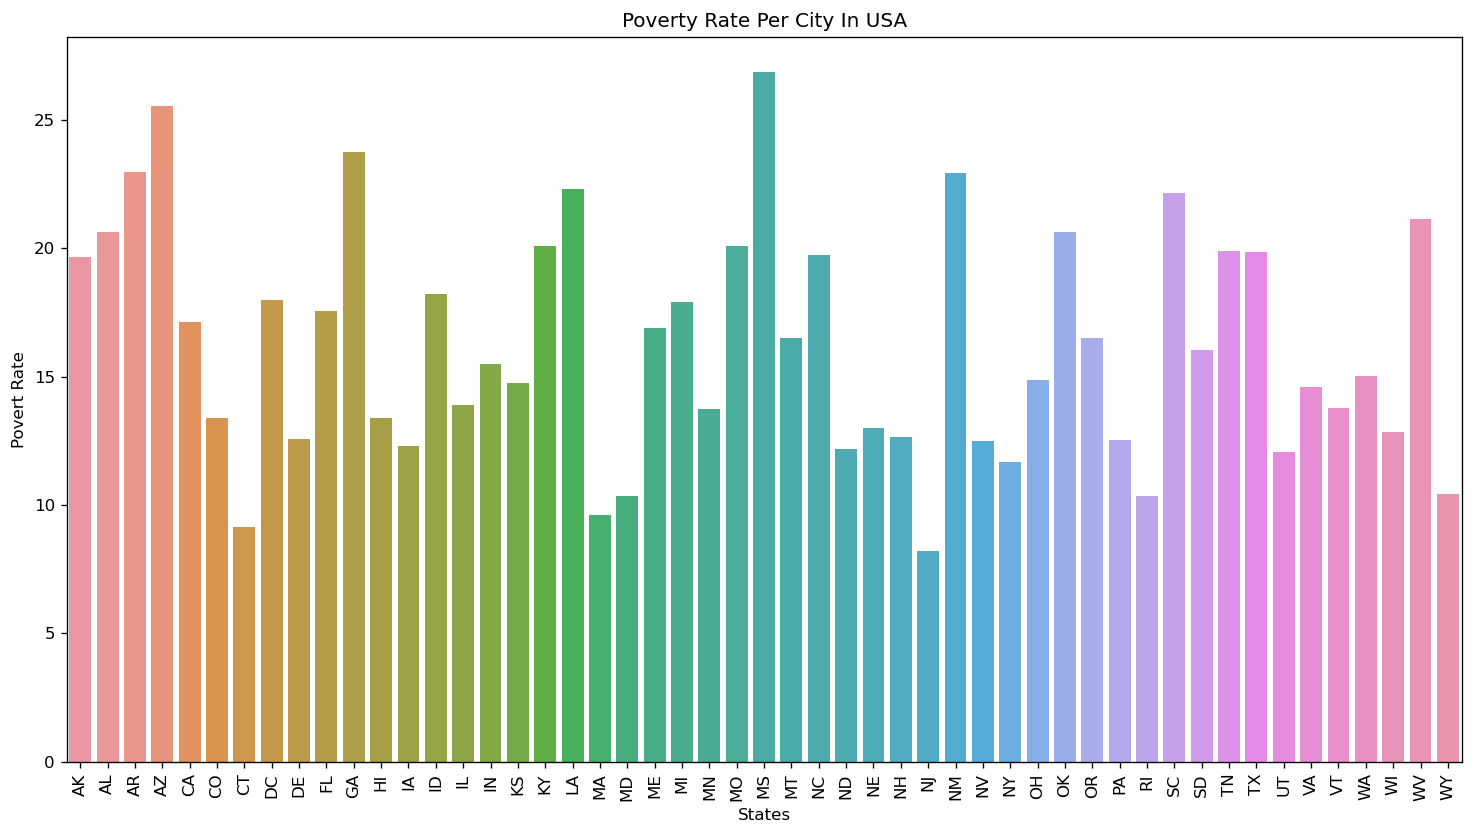

In [241]:

plt.figure(figsize=(15,8), dpi=120)
sns.barplot(data=grouped_poverty,
            x="Geographic Area",
            y="poverty_rate")
plt.xlabel("States")
plt.ylabel("Povert Rate")
plt.xticks(rotation = 90)
plt.title("Poverty Rate Per City In USA")
plt.show()

From the chart we can see Ms has the highest Poverty rate.Hmmm
There might be a number of factors that makes these to happen .Lets explore further 

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [255]:
#Here we remove NaN so we can convert columns to numeric so we can get the accurate average percentage of each state
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")
df_pct_completed_hs["percent_completed_hs"].fillna(df_pct_completed_hs["percent_completed_hs"].mean(), inplace=True)
df_pct_completed_hs.isna().values.any()
grouped_hs = df_pct_completed_hs.groupby("Geographic Area", as_index=False).agg({"percent_completed_hs": pd.Series.mean})


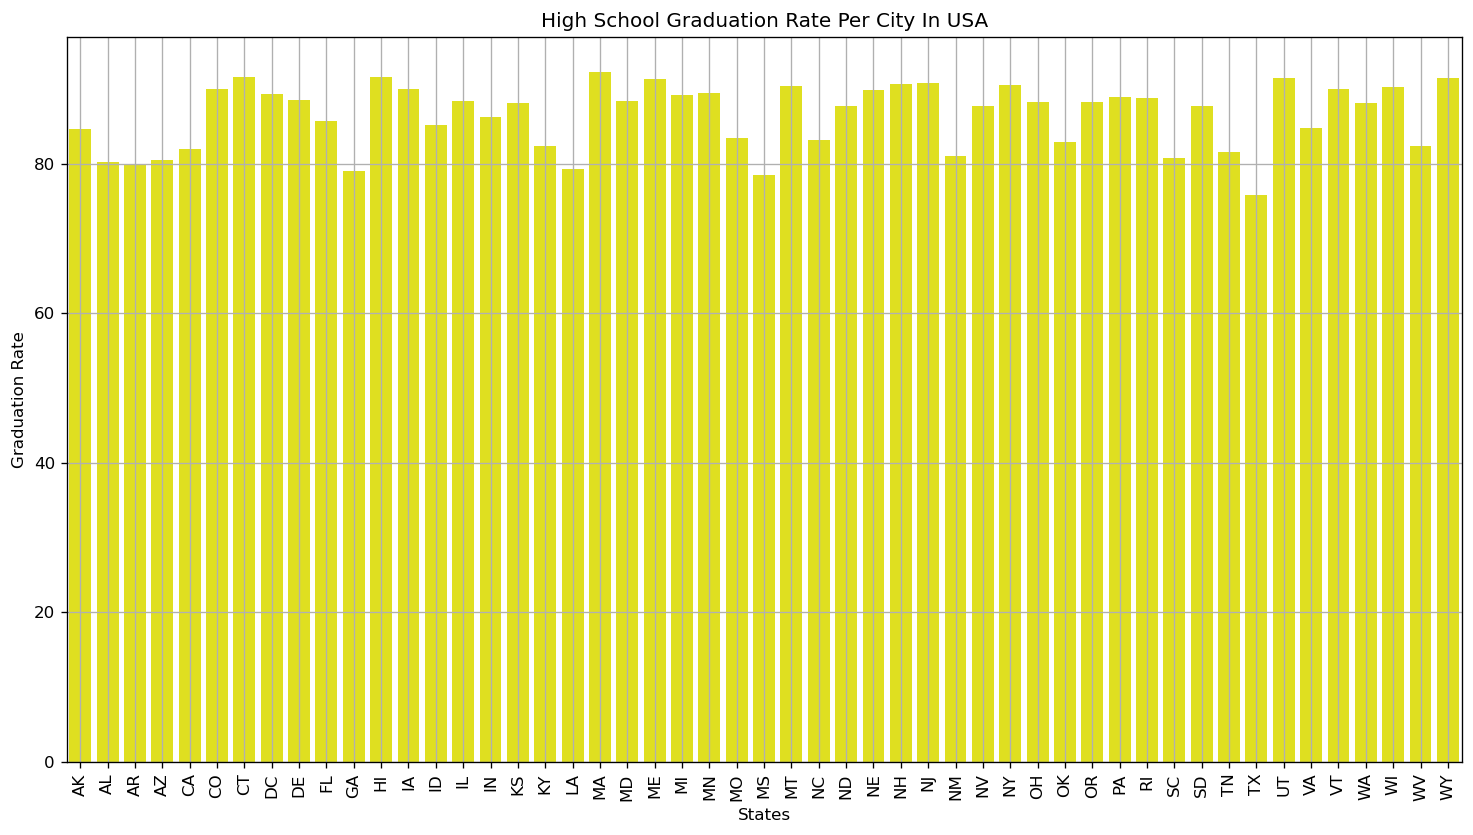

In [261]:
plt.figure(figsize=(15,8), dpi=120)
sns.barplot(data=grouped_hs,
            x="Geographic Area",
            y="percent_completed_hs",
           color="yellow")
plt.xlabel("States")
plt.ylabel("Graduation Rate")
plt.xticks(rotation = 90)
plt.title("High School Graduation Rate Per City In USA")
plt.grid()
plt.show()

In [ ]:
We can see here the rate of the granduate is highest in PA

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

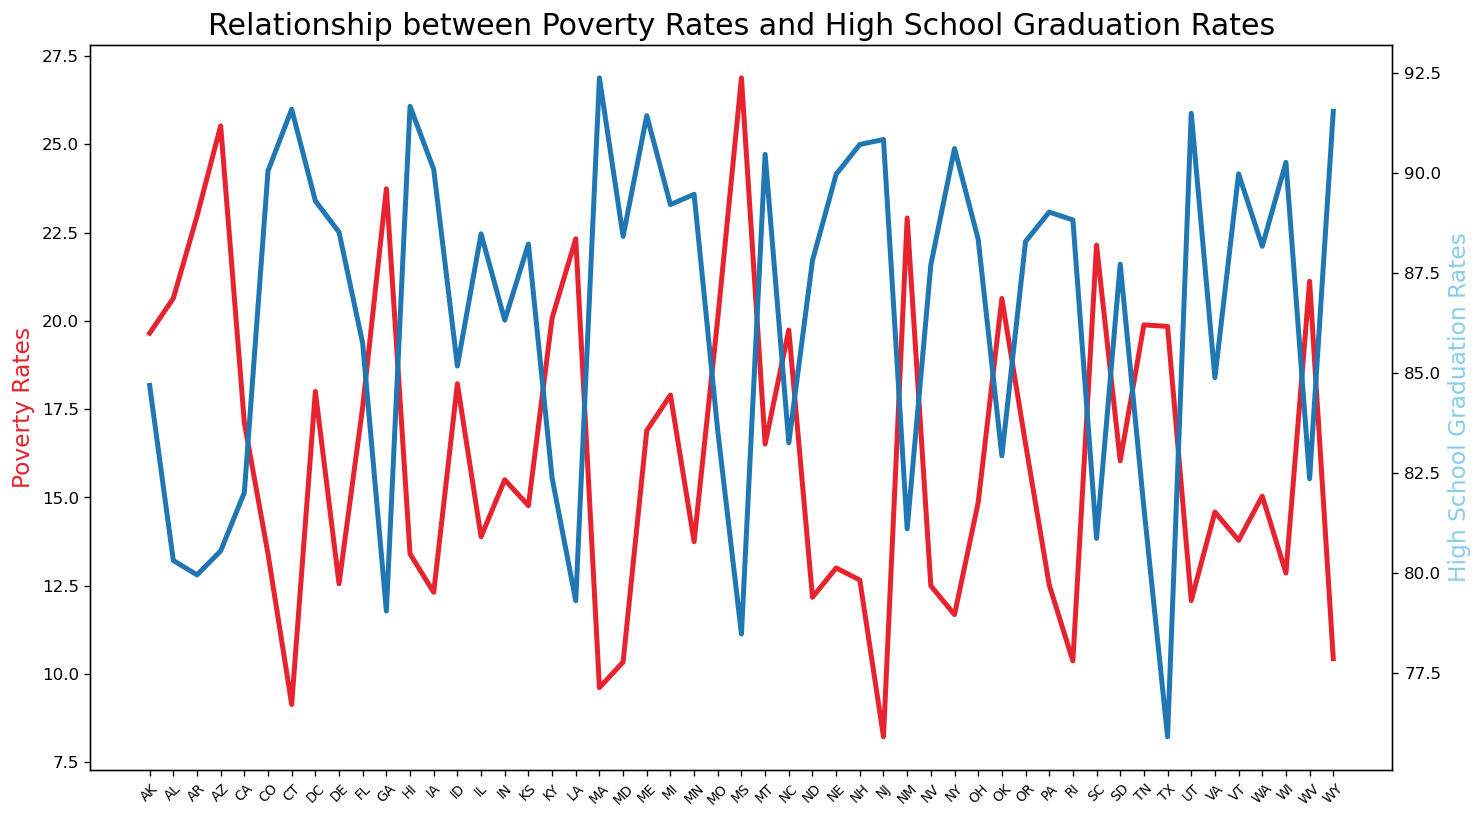

In [263]:
plt.figure(figsize=(14,8), dpi=120) # increases size and resolution
plt.title('Relationship between Poverty Rates and High School Graduation Rates', fontsize=18)

plt.xticks(fontsize=8, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('Poverty Rates', color='#E6232E', fontsize=14)
ax2.set_ylabel('High School Graduation Rates', color='skyblue', fontsize=14)

ax1.plot(grouped_poverty["Geographic Area"], grouped_poverty["poverty_rate"], color='#E6232E', linewidth=3)
ax2.plot(grouped_hs["Geographic Area"], grouped_hs["percent_completed_hs"], linewidth=3)

# Displays chart explicitly
plt.show()

What do we see here? Well, first off we can spot states with high graduates tends to have lower poverty rate .The relationship between the poverty and graduate rate is very strong.

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

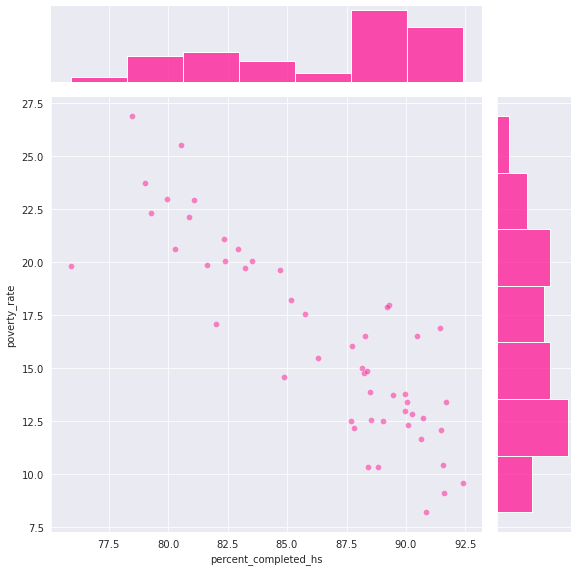

In [264]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=grouped_hs.percent_completed_hs, 
                y=grouped_poverty.poverty_rate, 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

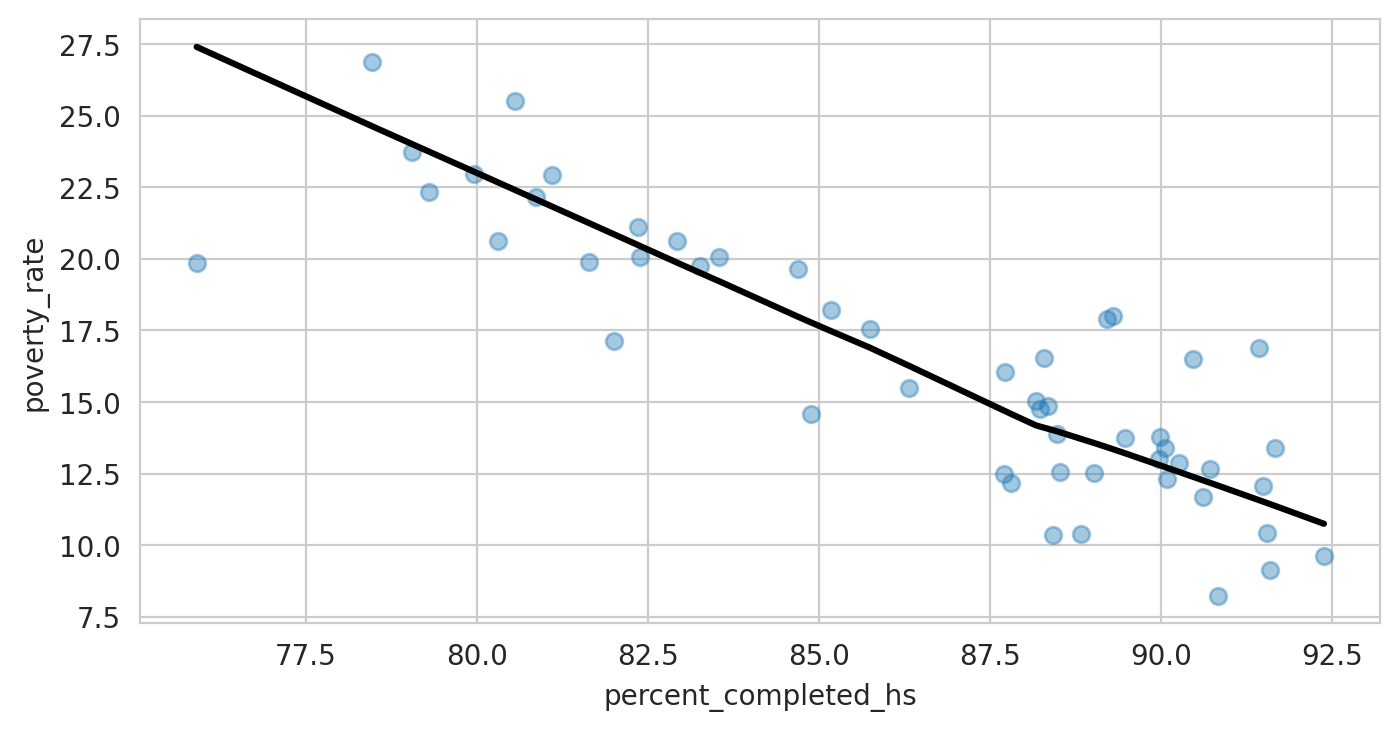

In [265]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(
                x=grouped_hs.percent_completed_hs,
                y=grouped_poverty.poverty_rate,
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

Chart show pretty much thesame has our other previous plots

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [272]:

#converting columns to float for simplicity and accuracy
column_to_digit=['share_white','share_black','share_native_american','share_asian','share_hispanic']

for col in column_to_digit:
    
        
    df_share_race_city[col]=pd.to_numeric(df_share_race_city[col],errors='coerce')
df_share_race_city.fillna(df_share_race_city.mean(), inplace=True)
print(df_share_race_city.isna().values.any())
grouped_race = df_share_race_city.groupby("Geographic area", as_index=False).agg({'share_white': pd.Series.mean, 'share_black': pd.Series.mean, 'share_native_american': pd.Series.mean, 'share_asian': pd.Series.mean, 'share_hispanic': pd.Series.mean})
grouped_race  



False


,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.97,0.62,45.50,1.39,2.21
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.92,2.71,1.73,5.55,29.56
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


In [273]:
bar_race = px.bar(
    data_frame=grouped_race,
    x="Geographic area",
    y=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
)
bar_race.show()

From the chart we can see all the states are dominated by white bar New mexico and Alaska
N.B: Hover to see the name of state not listed Above

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [276]:
killed_by_race = df_fatalities.value_counts("race")
killed_by_race

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
dtype: int64

In [278]:
killed_by_race_pie = px.pie(
    data_frame=killed_by_race,
    values=killed_by_race.values,
    names=killed_by_race.index,
    hole=0.6
)
killed_by_race_pie.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [279]:
killed_gender = df_fatalities.value_counts("gender")
killed_gender

gender
M    2428
F     107
dtype: int64

In [281]:
bar = px.bar(x=['M', 'F'],
             y=killed_gender.values,
             color=killed_gender.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Total Number of Deaths of Men and Women?')

bar.update_layout(xaxis_title='Gender', 
                  yaxis_title='Total Total Number of Deaths of Men and Women',
                  coloraxis_showscale=False)
bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [282]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


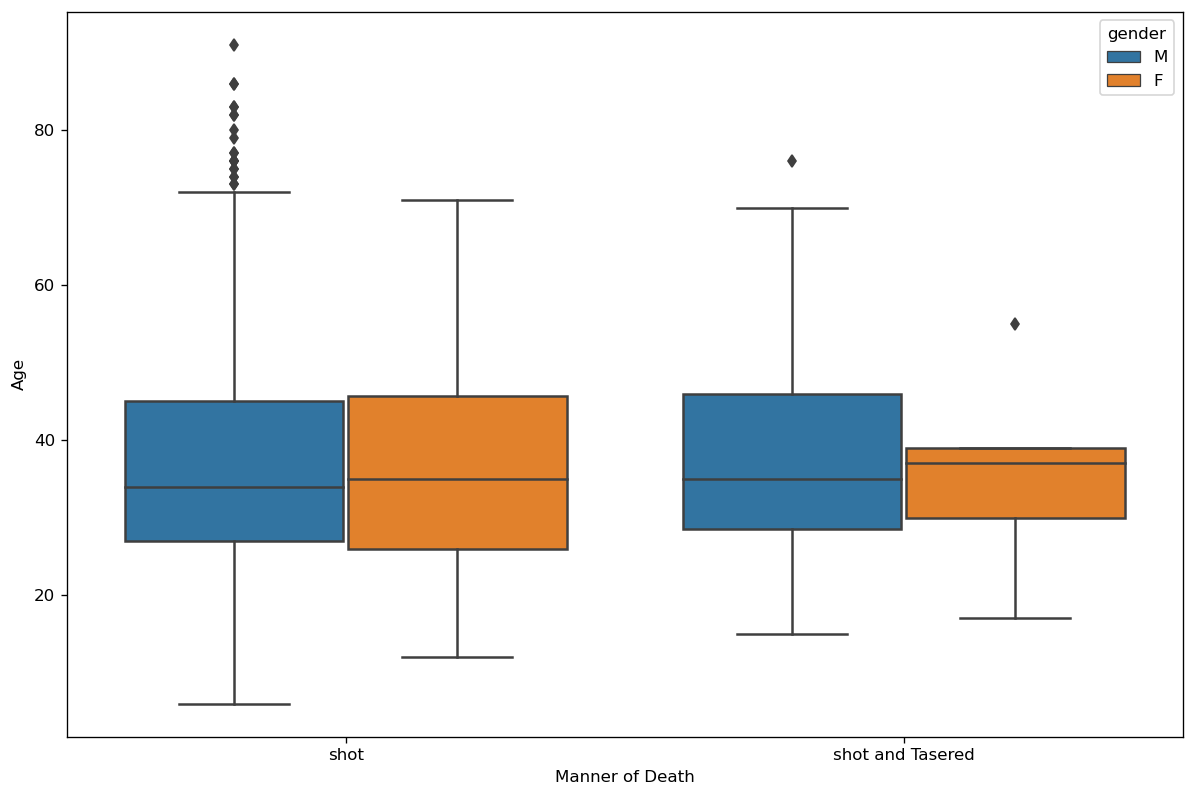

In [283]:
plt.figure(figsize=(12,8), dpi=120)
sns.boxplot(
    data=df_fatalities,
    x="manner_of_death",
    y="age",
    hue="gender"
)
plt.xlabel("Manner of Death")
plt.ylabel("Age")
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [284]:
armed = df_fatalities.value_counts("armed")

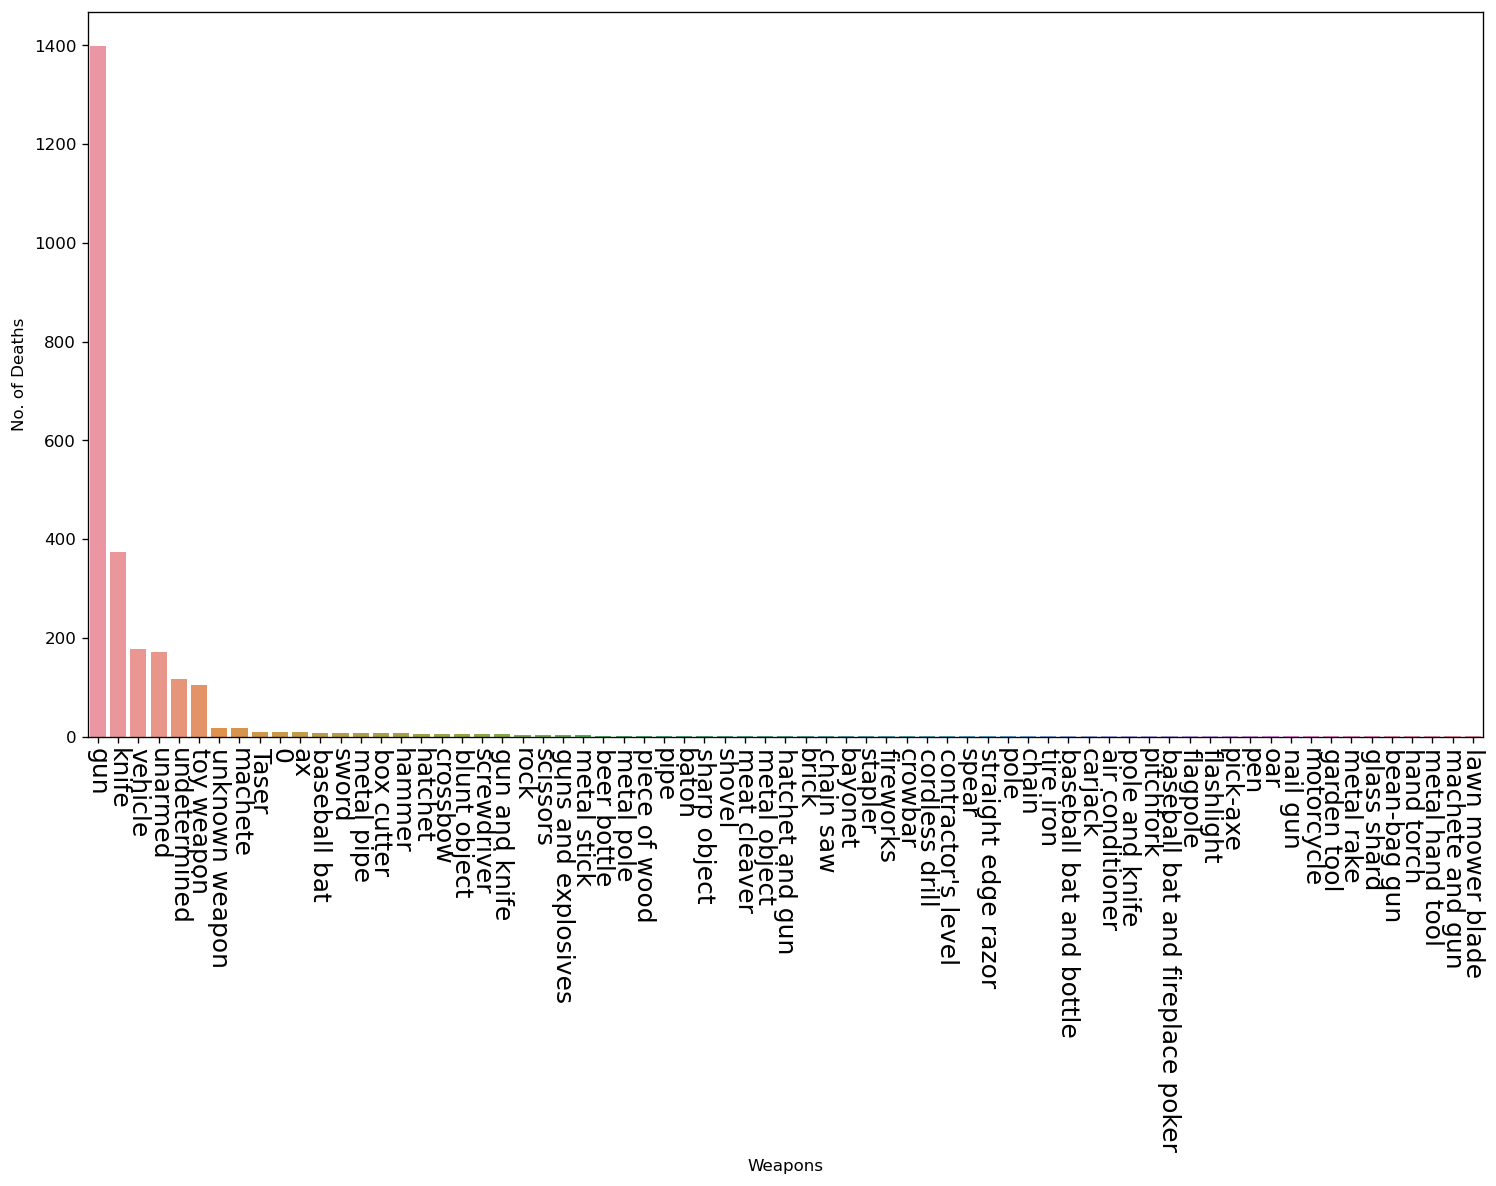

In [286]:
plt.figure(figsize=(15,8), dpi=120)
sns.barplot(
    x=armed.index,
    y=armed.values
)
plt.xlabel("Weapons")
plt.ylabel("No. of Deaths")
plt.xticks(fontsize=15, rotation=270)
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [288]:
under_25 = df_fatalities[df_fatalities["age"] < 25].count() / df_fatalities["age"].count()
print(under_25)

id                        0.18
name                      0.18
date                      0.18
manner_of_death           0.18
armed                     0.18
age                       0.18
gender                    0.18
race                      0.18
city                      0.18
state                     0.18
signs_of_mental_illness   0.18
threat_level              0.18
flee                      0.18
body_camera               0.18
dtype: float64


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

<Figure size 1800x960 with 0 Axes>

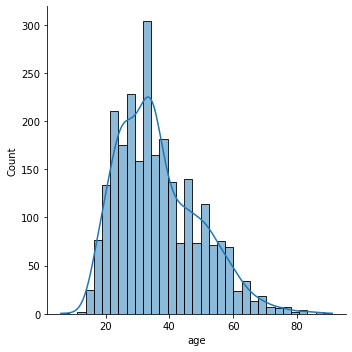

In [289]:
plt.figure(figsize=(15,8), dpi=120)
sns.displot(
    data=df_fatalities,
    x="age",
    kde=True
)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

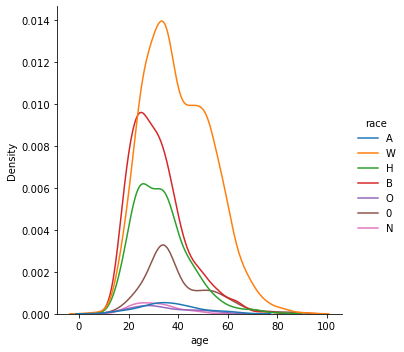

In [300]:
sns.displot(
    data=df_fatalities,
    x="age",
    kind="kde",
    hue="race"
)
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

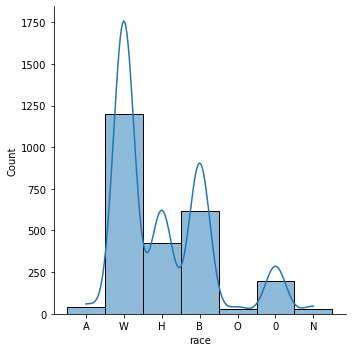

In [301]:
sns.displot(
    data=df_fatalities,
    x="race",
    kde=True
)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [302]:
mental_ilness = df_fatalities.value_counts("signs_of_mental_illness")

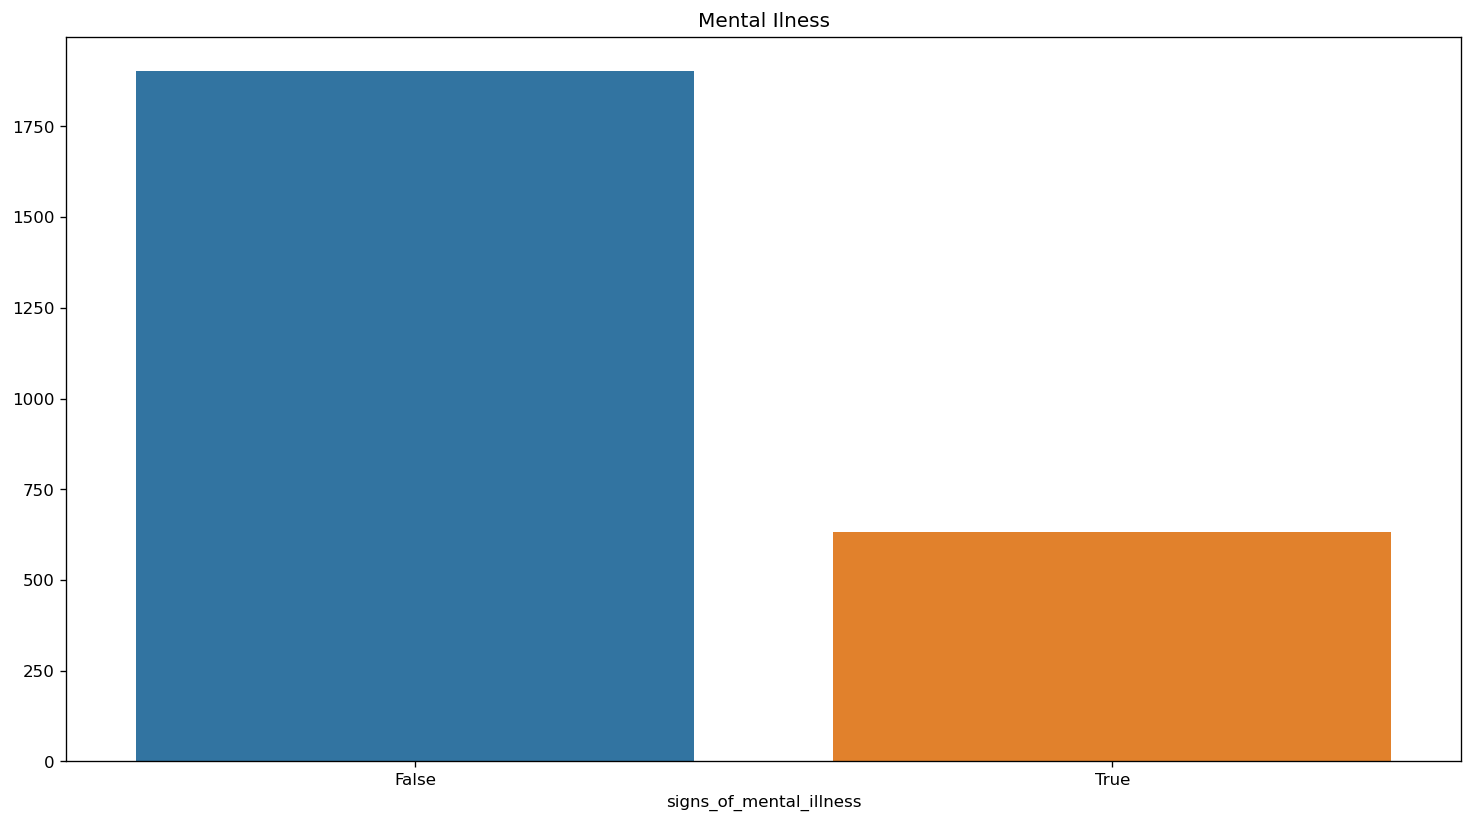

In [303]:
plt.figure(figsize=(15,8), dpi=120)
sns.barplot(
    x=mental_ilness.index,
    y=mental_ilness.values
)
plt.title("Mental Ilness")
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [304]:
state_vise_killing = df_fatalities.value_counts("state").sort_values(ascending=False)[:10]

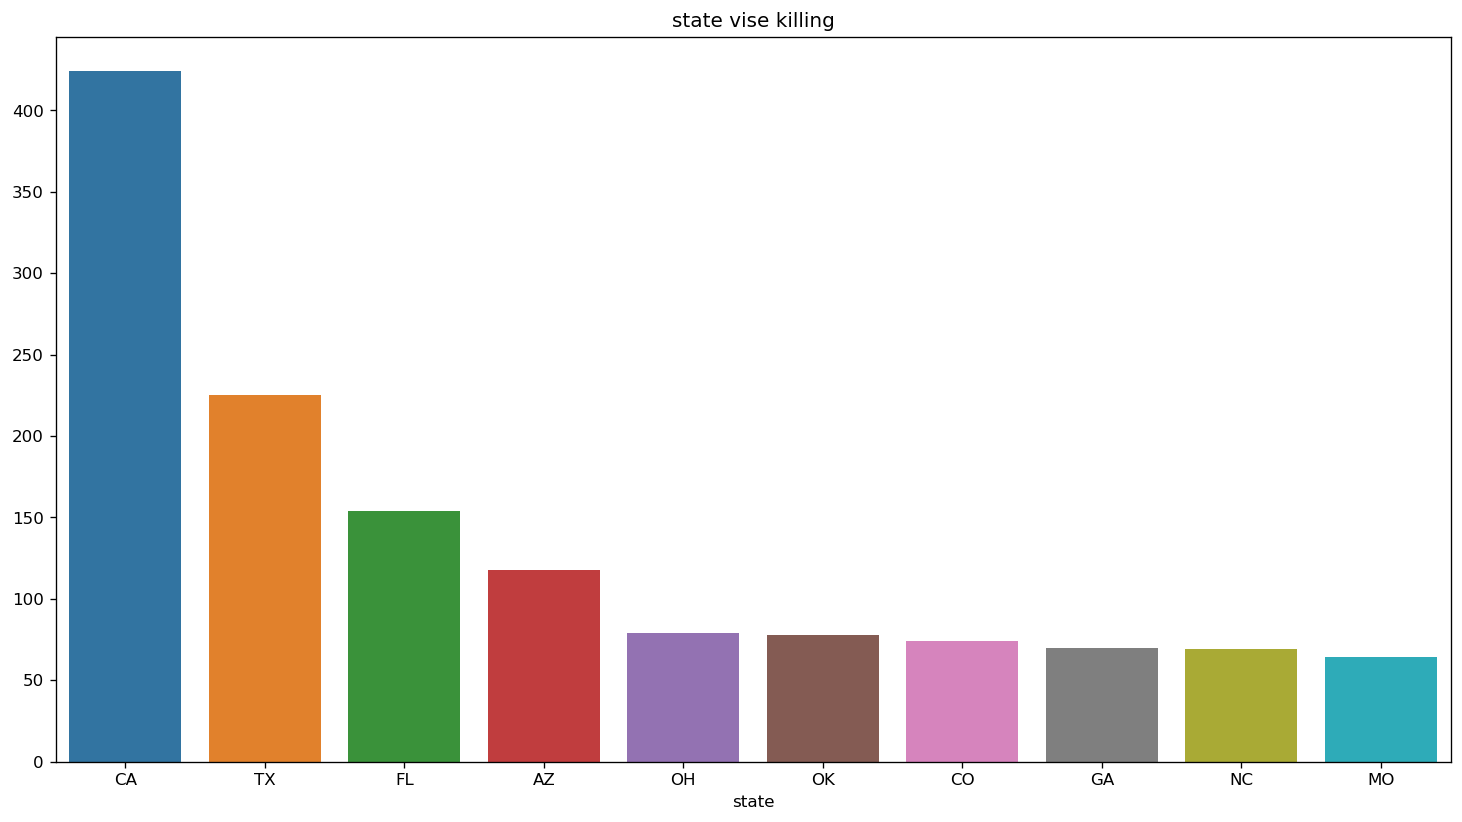

In [305]:
plt.figure(figsize=(15,8), dpi=120)
sns.barplot(
    x=state_vise_killing.index,
    y=state_vise_killing.values
)
plt.title("state vise killing")
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [306]:
top_10_states = df_fatalities.value_counts("state").sort_values(ascending=False)[:10].index
top_10_states

Index(['CA', 'TX', 'FL', 'AZ', 'OH', 'OK', 'CO', 'GA', 'NC', 'MO'], dtype='object', name='state')

In [307]:
rate_of_death_by_race = df_fatalities.groupby(["state", "race"], as_index=False).agg(count=pd.NamedAgg("race", "count"))
rate_of_death_by_race

,state,race,count
0,AK,0,1
1,AK,B,1
2,AK,N,6
3,AK,W,7
4,AL,0,4
...,...,...,...
196,WV,W,20
197,WY,0,1
198,WY,H,1
199,WY,N,1


In [308]:
burst = px.sunburst(
    data_frame=rate_of_death_by_race,
    path=["state","race"],
    values="count"
)
burst.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [309]:
state_killing = df_fatalities.value_counts("state")

In [312]:
map = px.choropleth(
    data_frame=state_killing,
    locations=state_killing.index,
    hover_name=state_killing.values,
    color=state_killing.index,
    locationmode="USA-states",scope="usa"
)
map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [316]:
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"])
df_fatalities["year"] = df_fatalities["date"].dt.year
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,2015


In [317]:
death_over_year = df_fatalities.value_counts("year")

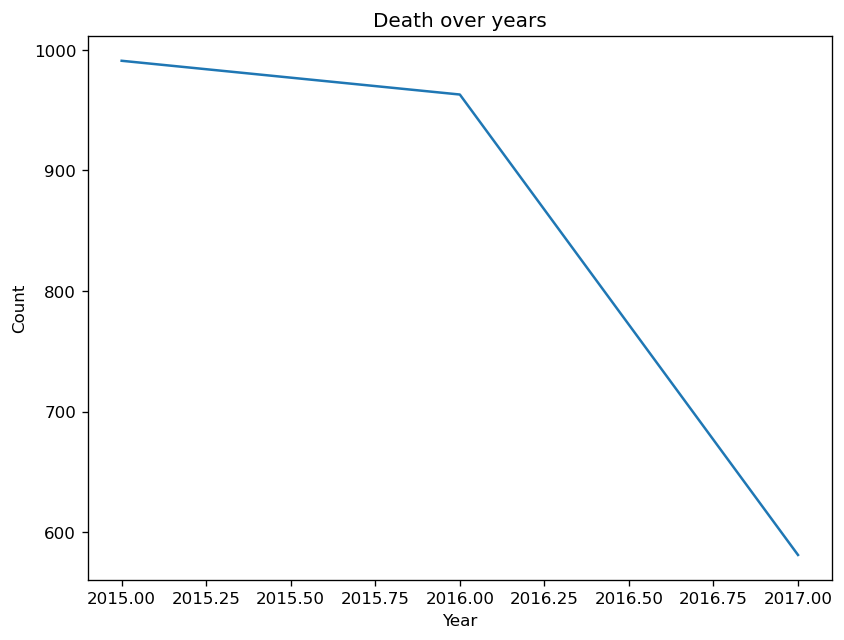

In [318]:
plt.figure(figsize=(8,6), dpi=120)
plt.plot(death_over_year.index, death_over_year.values)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Death over years")
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).